# Kales Linear Regression Model

## Import neccessary modules

In [422]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [389]:
# load dataset using the pandas library
dataset = pd.read_csv('nyeri_kales_dataset2.csv')

In [390]:
# display first 5 rows of dataset
dataset.head()

,Max_Temperature_C,Min_Temperature_C,GDD,Humidity_Level,Soil_Type,Daily_Precipitation_mm,Sunlight_Duration_hrs
0,26.490142,11.852355,19.171249,46.699303,Sandy,1.107484,8.852440
1,24.585207,13.818833,19.202020,44.182714,Loam,7.595824,9.806038
2,26.943066,7.202865,17.072965,65.457210,Loam,9.880656,11.996797
3,29.569090,11.125938,20.347514,68.259029,Sandy,9.012960,6.628848
4,24.297540,8.698715,16.498127,41.263446,Sandy,6.516679,8.991425


In [391]:
# get a brief description on the enrire dataset
dataset.describe()

,Max_Temperature_C,Min_Temperature_C,GDD,Humidity_Level,Daily_Precipitation_mm,Sunlight_Duration_hrs
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,24.958300,10.063873,17.511086,60.087193,4.999538,9.086045
std,2.766364,1.949230,1.627142,11.584346,2.943744,1.720075
min,18.000000,5.000000,12.810573,40.197599,0.001884,6.002657
25%,22.899078,8.809417,16.471878,49.550844,2.400010,7.610689
50%,25.038391,10.057063,17.527845,60.432881,5.198418,9.174008
75%,26.910350,11.302485,18.539929,69.460798,7.592743,10.568361
max,30.000000,15.000000,21.696456,79.976549,9.997138,11.997264


In [392]:
# check whether there are any missing values
dataset.isnull().sum()

Max_Temperature_C         0
Min_Temperature_C         0
GDD                       0
Humidity_Level            0
Soil_Type                 0
Daily_Precipitation_mm    0
Sunlight_Duration_hrs     0
dtype: int64

In [393]:
# since you use a linear regression, remain with only dependent and independent variables
drop_columns = ['Humidity_Level', 'Soil_Type', 'Daily_Precipitation_mm', 'Sunlight_Duration_hrs']
df = dataset.drop(drop_columns, axis=1)
df

,Max_Temperature_C,Min_Temperature_C,GDD
0,26.490142,11.852355,19.171249
1,24.585207,13.818833,19.202020
2,26.943066,7.202865,17.072965
3,29.569090,11.125938,20.347514
4,24.297540,8.698715,16.498127
...,...,...,...
495,26.616730,9.437799,18.027265
496,21.888262,13.595373,17.741817
497,24.428984,11.281686,17.855335
498,22.373145,8.857642,15.615394


In [394]:
# extract only the dependent variable from X axis to y axis
X = df.drop('GDD', axis=1) 
y = df['GDD']

In [395]:
# display the new dataset
X

,Max_Temperature_C,Min_Temperature_C
0,26.490142,11.852355
1,24.585207,13.818833
2,26.943066,7.202865
3,29.569090,11.125938
4,24.297540,8.698715
...,...,...
495,26.616730,9.437799
496,21.888262,13.595373
497,24.428984,11.281686
498,22.373145,8.857642


In [396]:
# display values on y axis
y


0      19.171249
1      19.202020
2      17.072965
3      20.347514
4      16.498127
         ...    
495    18.027265
496    17.741817
497    17.855335
498    15.615394
499    15.998383
Name: GDD, Length: 500, dtype: float64

## Explaratory Data Analysis(EDA)

### Using the matplotlib and seaborn libraries, I plotted a histogram that clearly shows the distribution of the y-axis(dependent variable) in my dataset.

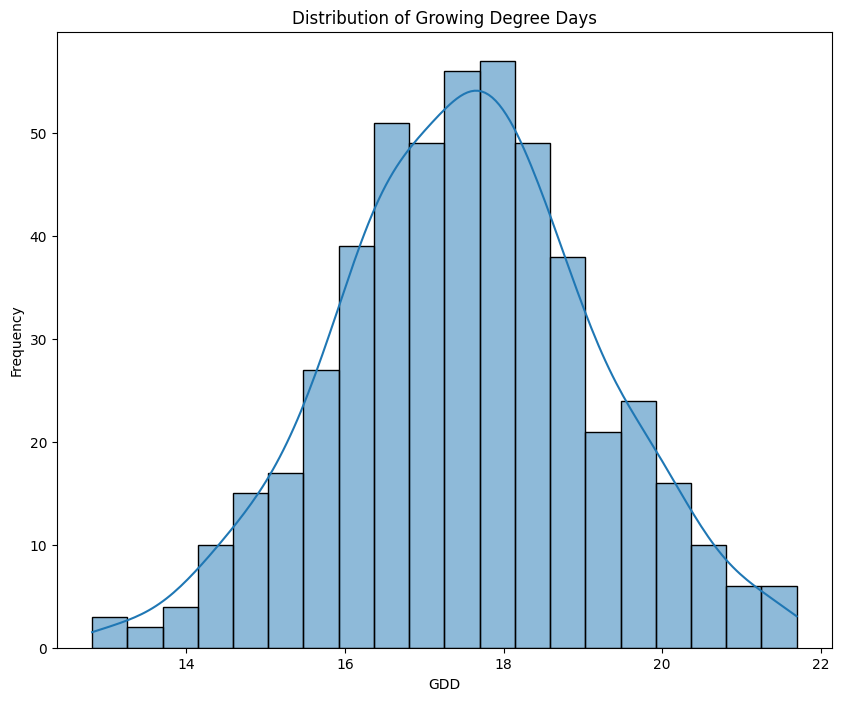

In [397]:
# visualize its distribution
plt.figure(figsize=(10, 8))
sb.histplot(df['GDD'], bins=20, kde=True)
plt.title('Distribution of Growing Degree Days')
plt.xlabel('GDD')
plt.ylabel('Frequency')
plt.show()

#### I also wanted to see the correlation between the different independent variables(featueres) and the dependent variables(target). This was achieved in two ways, using the basic pandas library and also adding some visual representtion using the seaborn library

In [398]:
# display correlation without a visual representation
df.corr()

,Max_Temperature_C,Min_Temperature_C,GDD
Max_Temperature_C,1.000000,-0.079920,0.802198
Min_Temperature_C,-0.079920,1.000000,0.531036
GDD,0.802198,0.531036,1.000000


#### In the above correlation matrix, values will range from 0 to 1. Any value from 0.8 to 1 indicates a very strong correlation, while any value ranging from . to 0.3 indicates a very poor correlation. Below I use the seaborn library to give a more visually appealing diagram:

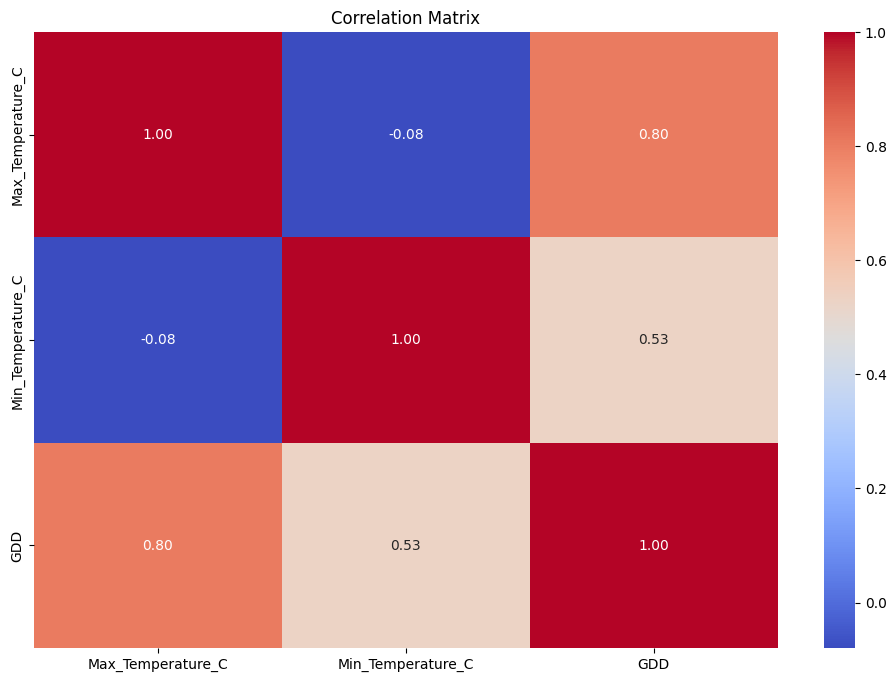

In [399]:
# visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Okay, so now we have determined that there is a correlation between the dependent and the independent variables. Let us find out is it is a positive or negative correlation. This is achived using a scatter plot.

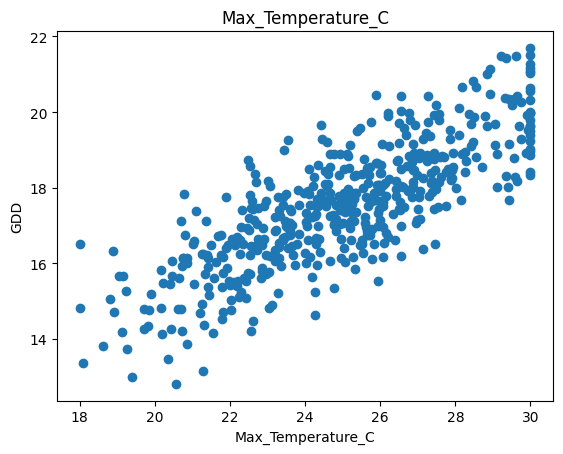

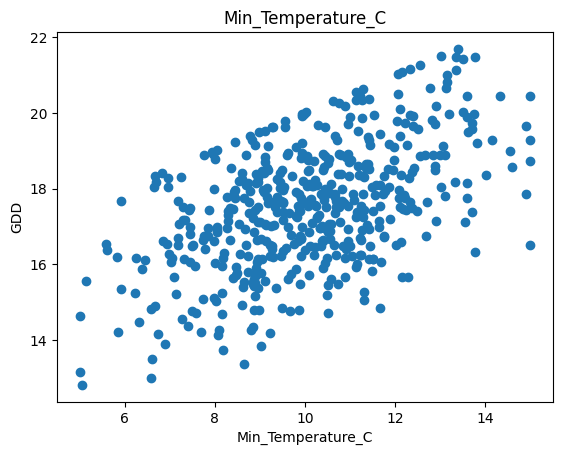

In [400]:
# visualize the type of correlation
for label in df.columns[:-1]: #all columns except the last GDD one
    plt.scatter(df[label], df['GDD']) #see how each label affects the GDD 
    plt.title(label) #title of diagram should be the variable being used
    plt.ylabel('GDD') #y label is GDD
    plt.xlabel(label) #X label is the variable being used
    plt.show()

### We see that both the maximum and minimum temperature have a positive correlation on the number of growing degree days. This means that an increase in the value of the feature will see a proportional increase in the target. 

### A final visual representation using a pairplot

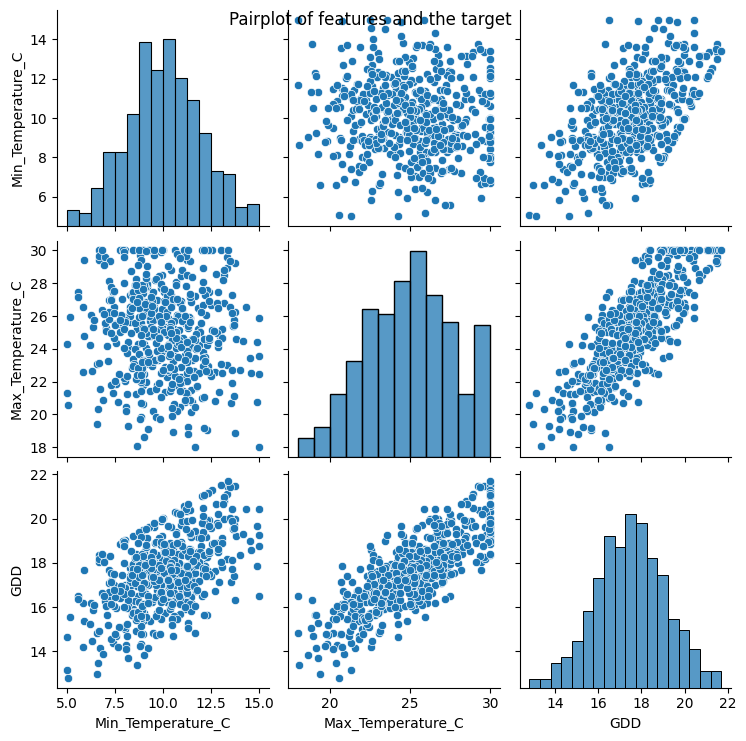

In [401]:
# Pairplot to visualize relationships between variables
sb.pairplot(df, vars=['Min_Temperature_C', 'Max_Temperature_C', 'GDD'])
plt.suptitle('Pairplot of features and the target') #sup for title to appear at the top centre
plt.show()

# Building the Model

## 1.Train,Test and Split categories

### Here you will subdivide dependent and independent variables into training and testing datasets. The training dataset is what is used to train your model, while the testing dataset is what is used to evaluate it, to see how well it behaves on generalized and new data. I used the 80-20 rule in splitting the data.

In [402]:
# divide both features and target into training and testing data
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 2.Model Training

In [403]:
# initialize a variable as the linearRegression model
lr = LinearRegression()

### after initializing the model, you will now fit the X_train and the y_train to the model. In mathematical terms, this is basically finding the best line of fit(Regression line), i.e y =mX+c

In [404]:
lr.fit(X_train,y_train)

LinearRegression()

## 3.Model Evaluation

### This part of our process involes 3 major steps:
    + predict target variables using the testing set
    + use evaluation metrics to measure its performance (I used MAE and RMSE)
    + visualize the actual vs predicted values (I used a scatter plot)

### fitting m and c to the linear regression model is what is termed as training the model. to see these values, you could imply call them

In [405]:
# to get the intercept, i.e y when x is 0
c = lr.intercept_
c

7.105427357601002e-15

In [406]:
# to get the slope(coefficient)of the line
m = lr.coef_
m

array([0.5, 0.5])

### As shown above, you can see that our dataset will have two coefficients because it is a multiple linear regression, meaning that it has more than one features(independent variables). 
### Now that you have both the coefficient and the slope, you could fit the values in to easily get the prediction 

In [407]:
y_pred_train1 = m*X_train+c
y_pred_train1

,Max_Temperature_C,Min_Temperature_C
107,12.761867,3.755345
336,11.261754,6.550500
71,14.807055,6.676437
474,14.967452,4.553817
6,14.868819,4.407606
...,...,...
323,15.000000,4.637161
192,12.821141,3.918937
117,10.746983,5.725767
47,14.085683,4.796955


### but this is monotonous as linear Regression has an inbuilt function that can easily achieve this

In [408]:
# now using the model predict the values of y
y_pred_train = lr.predict(X_train)
y_pred_train

array([16.51721202, 17.8122547 , 21.48349216, 19.52126814, 19.2764253 ,
       15.44821243, 18.87451095, 14.71831585, 18.4741994 , 16.48769131,
       19.87715337, 17.78716132, 17.09022569, 16.84431005, 18.52997362,
       15.64787585, 18.14353652, 20.55979045, 18.56735323, 16.94076939,
       15.1699127 , 14.25145458, 15.10875927, 16.51046773, 20.99396851,
       19.79302007, 18.54233321, 14.53871321, 18.74515279, 16.03218719,
       14.20825475, 17.7410919 , 18.64244998, 18.48504321, 17.49765457,
       17.69642385, 17.23929332, 16.40388974, 19.69983438, 17.96953104,
       18.35287265, 17.65239906, 14.82940558, 14.1459672 , 19.77903583,
       16.49812737, 18.06853352, 15.2354665 , 16.27250433, 16.66166918,
       21.12973566, 17.75552834, 18.17004494, 15.52608945, 21.48621596,
       16.93866855, 16.17166212, 18.02906787, 13.82471697, 14.33585192,
       17.5302697 , 18.94944256, 19.92000266, 16.07004226, 16.84631511,
       17.62038094, 16.20759865, 18.71706118, 15.99838318, 13.36

### Now i will use RMSE(Root mean squared error) and MAE(Mean absolute error) to predict the accuracy of my model

In [418]:
## here i was getting alot of errors due to the y_pred_train and the y_train being of 
## different datatypes and i converted them both to an array type
## first print out the datatype
# print( 'y_train is a',type(y_train))
# print('y_pred_train is a ', type(y_pred_train))
## next convert them to a numpy array
y_train = np.array(y_train).reshape(-1,1)  # Convert pandas Series to NumPy 2D array
y_pred_train = np.array(y_pred_train).reshape(-1,1)
print( 'type y_train is a ',type(y_train))
print('y_pred_train is a ', type(y_pred_train))

type y_train is a  <class 'numpy.ndarray'>
y_pred_train is a  <class 'numpy.ndarray'>


In [410]:
# use inbuilt method to see accuracy
lr.score(X_test, y_test)

1.0

In [411]:
# Evaluate the model using R2 
r2 = r2_score(y_train,y_pred_train)
r2

1.0

In [412]:
# Evaluate the model on the test set using the MSE
mse = mean_squared_error(y_train, y_pred_train) #parameters are the values for real target and the predicted target
print("Mean Squared Error on the test set:", mse)

Mean Squared Error on the test set: 1.2408782039126516e-29


In [424]:
# Evaluate the model using RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error on the test set:", rmse)

Root Mean Squared Error on the test set: 3.5226101173883145e-15


In [423]:
# Evaluate the model using MAE(BEST MEASURE)
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error on the test set:", mae)

Mean Absolute Error on the test set: 2.864375403532904e-15


### Now to visualize the actual vs. predicted values using a scatter plot

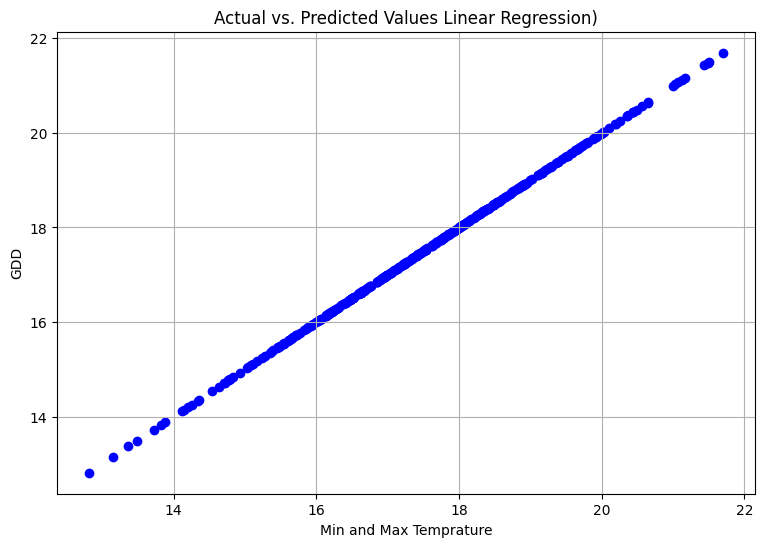

In [436]:
# still cant explain. consulte
plt.figure(figsize=(9,6))
plt.scatter(y_train, y_pred_train, color='blue',)
plt.xlabel('Min and Max Temprature')
plt.ylabel('GDD')
plt.grid(True)
plt.title('Actual vs. Predicted Values Linear Regression)')
plt.show()

# plt.figure(figsize=(8, 6))
# plt.scatter(y_pred_train, y_pred, color='blue', label='Actual vs. Predicted')
# plt.plot([y_pred_train.min(), y_pred_train.max()], [y_pred_train.min(), y_pred_train.max()], 'k--', lw=2)  # Diagonal line
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs. Predicted Values (Multiple Linear Regression)')
# plt.legend()
# plt.grid(True)
# plt.show()


## 4.Model Interpretation

###  Here one interprets the coefficients of the linear regression model to understand the relationship between the independent variables and the dependent variable. I did this with the aid of a visual diagram. 

/tmp/ipykernel_10033/3291080546.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


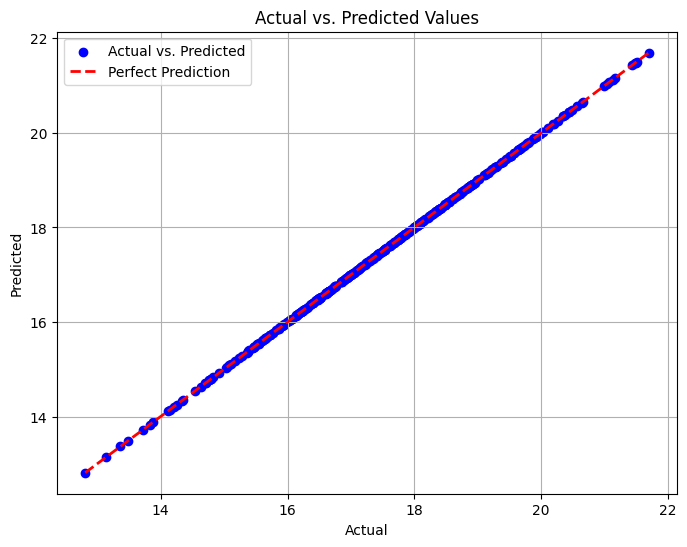

In [439]:
# still cant explain. consulte

# plt.scatter(X_train, y_train, label="Data", color="blue")
# x = tf.linspace(-20, 40, 100)
# plt.plot(x, lr.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
# plt.legend()
# plt.title("Bikes vs Temp")
# plt.ylabel("Number of bikes")
# plt.xlabel("Temp")
# plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## 5.Model Refinement

### if the model performamnce is not satisfactory, one considers tuning the hyperparameters. My models accuracy has an MSE of ` ` and so I did not find it neccessary to do hypaparameter tuning. however, just for comparison of results: 

# 6.Model Deploymentimport tensorflow as tf

In [420]:
# Load your trained TensorFlow model
model = tf.keras.models.load_model('Kales_Regression.h5') #.h5 extension?

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


OSError: No file or directory found at Kales_Regression.h5